#Домашнее задание № 13

#Алгоритмы кластеризации



In [732]:
# установим библиотеку
!pip install opencv-python

In [733]:
# вспомогательная функция для отображения картинок
import matplotlib.pyplot as plt
import cv2
import skimage
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

def draw_picture(image, title, bgr=True):
    if bgr:
        b, g, r = cv2.split(image)
        image = cv2.merge([r, g, b])

    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(image)
    plt.title(title)
    plt.show()

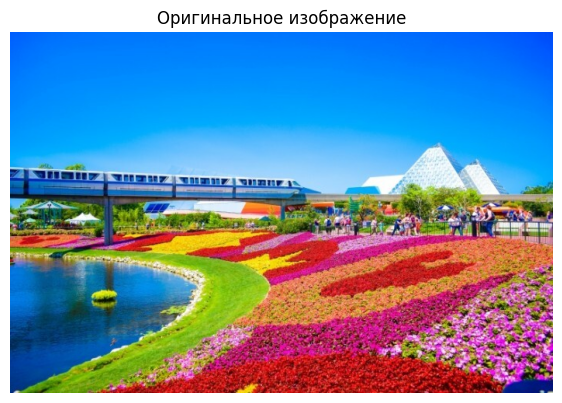

In [734]:
# посмотрим на нашу картинку
img = cv2.imread('/content/feml.jpeg')
draw_picture(img, 'Оригинальное изображение', bgr=True)

#2. Реализуем 3 модели кластеризации

In [735]:
type(img)

numpy.ndarray

a) KMeans. Число кластеров K = 2, 5, 10, 20

In [736]:
# загрузим библиотеки
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [737]:
# посмотрим размер нашего изображения
img.shape

(466, 700, 3)

In [738]:
# сделаем наше изображение "плоским" для загрузки в модель
original_image = img
reshaped_img = np.reshape(original_image,
	                        ((original_image.shape[0] * original_image.shape[1]),
                          3)
                         )
reshaped_img

array([[255,  92,   0],
       [255,  92,   0],
       [253,  93,   0],
       ...,
       [189, 213, 203],
       [187, 212, 202],
       [182, 208, 195]], dtype=uint8)

K=2

In [739]:
# построим модель с 2 кластерами
km = KMeans(n_clusters=2)

In [740]:
# обучим модель
km.fit(reshaped_img)
km

KMeans(n_clusters=2)

In [741]:
# получим предсказания
target = km.fit_predict(reshaped_img)
target

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [742]:
set(target)

{0, 1}

In [743]:
len(target)

326200

In [744]:
# найдем расположение центроидов (центров кластеров)
color_space = km.cluster_centers_
color_space

array([[ 73.93045478, 102.35643063, 163.62217834],
       [235.06958208, 145.37434183,  33.01999338]])

In [745]:
color_space[target]

array([[235.06958208, 145.37434183,  33.01999338],
       [235.06958208, 145.37434183,  33.01999338],
       [235.06958208, 145.37434183,  33.01999338],
       ...,
       [ 73.93045478, 102.35643063, 163.62217834],
       [ 73.93045478, 102.35643063, 163.62217834],
       [ 73.93045478, 102.35643063, 163.62217834]])

In [746]:
# вернем обратно в беззнаковое целое число, чтобы визуализировать изображение
output_image = np.reshape(color_space.astype('uint8')[target],
                          (original_image.shape[0], original_image.shape[1], 3)
                         )

In [747]:
# проверим размер
output_image.shape

(466, 700, 3)

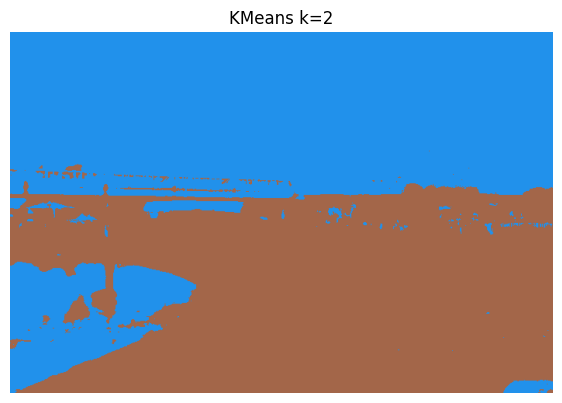

In [748]:
draw_picture(output_image, 'KMeans k=2', bgr=True)

k=5

In [749]:
# для дальнейших операций напишем маленькубю функцию
def KM_k(original_image=original_image, reshaped_img=reshaped_img, k=2):

  km_ = KMeans(n_clusters=k)
  target_ = km_.fit_predict(reshaped_img)
  color_space_ = km_.cluster_centers_
  output_image_ = np.reshape(color_space_.astype('uint8')[target_],
                             (original_image.shape[0], original_image.shape[1], 3)
                            )
  draw_picture(output_image_, 'KMeans k={}'.format(k), bgr=True)

  return

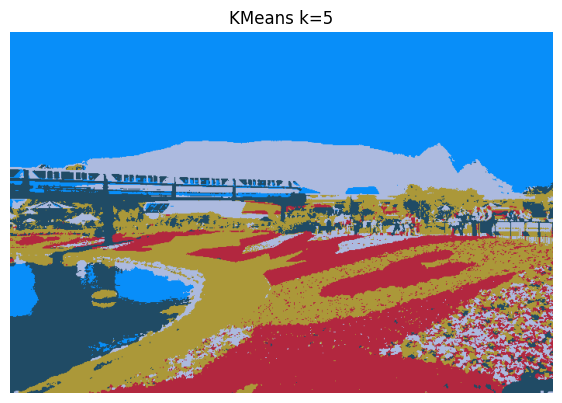

In [750]:
# посмотрим
KM_k(k=5)

k=10

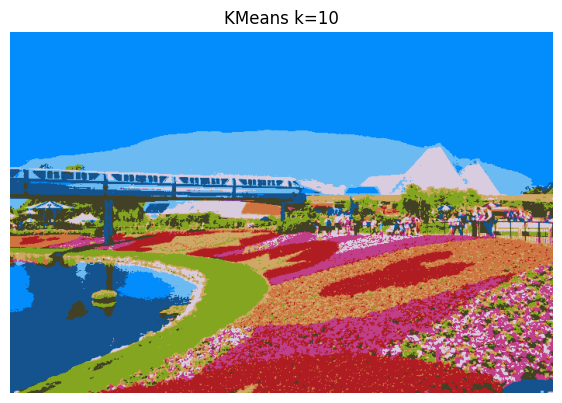

In [751]:
# посмотрим
KM_k(k=10)

k=20

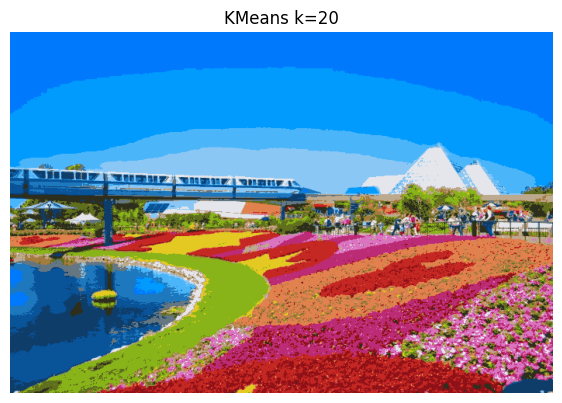

In [752]:
# посмотрим
KM_k(k=20)

b) DBSCAN

In [753]:
from PIL import Image
import os

In [754]:
image = Image.open('/content/feml.jpeg')
image.size

(700, 466)

In [755]:
a, b = image.size

In [756]:
new_size = (a//4, b//4)
new_size

(175, 116)

In [757]:
image_4 = image.resize(new_size)
img_4 = np.array(image_4)

array([[[  0,  93, 254],
        [  0,  95, 254],
        [  0,  95, 253],
        ...,
        [  0,  76, 248],
        [  0,  75, 247],
        [  0,  73, 246]],

       [[  0,  95, 254],
        [  0,  97, 254],
        [  0,  97, 254],
        ...,
        [  1,  78, 249],
        [  1,  77, 249],
        [  0,  75, 248]],

       [[  0,  98, 253],
        [  0,  99, 254],
        [  0, 100, 254],
        ...,
        [  1,  79, 250],
        [  1,  79, 250],
        [  1,  78, 249]],

       ...,

       [[  2,  52, 128],
        [  0,  53, 137],
        [  1,  53, 136],
        ...,
        [  1,  21, 123],
        [  3,  19, 117],
        [  2,  17, 125]],

       [[  1,  53, 127],
        [  3,  49, 127],
        [  9,  52, 118],
        ...,
        [  4,  22, 126],
        [  0,  21, 120],
        [  0,  18, 115]],

       [[  2,  46, 127],
        [ 87, 114, 162],
        [144, 165, 151],
        ...,
        [ 21,  51, 131],
        [ 60,  76, 126],
        [ 98, 108, 129]]], dtype=uint8)
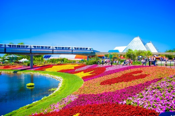

In [758]:
img_4

In [759]:
reshaped_img_4 = np.reshape(img_4,
	                          ((img_4.shape[0] * img_4.shape[1]),
                            3)
                           )
reshaped_img_4

array([[  0,  93, 254],
       [  0,  95, 254],
       [  0,  95, 253],
       ...,
       [ 21,  51, 131],
       [ 60,  76, 126],
       [ 98, 108, 129]], dtype=uint8)

In [760]:
from sklearn.cluster import DBSCAN
import cv2

In [761]:
# Создим объект DBSCAN
dbscan = DBSCAN(eps=10, min_samples=25)

In [762]:
# обучим модель
dbscan.fit(reshaped_img_4)
dbscan

DBSCAN(eps=10, min_samples=25)

In [763]:
# Получим предсказания
target = dbscan.fit_predict(reshaped_img_4)
target

array([ 0,  0,  0, ..., -1, -1, -1])

In [764]:
print('Итого найдено : {} кластеров'.format(len(set(target))), np.unique(target))

Итого найдено : 15 кластеров [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [765]:
# начнем строить наш df
# с ним уже привычнее)
import pandas as pd

# это df нашего "плоского" фото
df = pd.DataFrame(reshaped_img_4)
df.head()

,0,1,2
0,0,93,254
1,0,95,254
2,0,95,253
3,0,97,254
4,0,99,255


In [766]:
# добавим найденные кластеры
df['clusters'] = target
df.head()

,0,1,2,clusters
0,0,93,254,0
1,0,95,254,0
2,0,95,253,0
3,0,97,254,0
4,0,99,255,0


In [767]:
# усредним значения внутри кластеров
df_ = df.groupby(['clusters']).mean().astype('uint8')
# а это уже нужная информация для извлечения цвета кластера
df_.head()

,0,1,2
clusters,,,
-1,139,116,109
0,30,155,253
1,6,86,151
2,120,159,192
3,48,120,182


In [768]:
# запомним наши цвета для раскраски
color_space = np.stack((df_[0].to_numpy(),
                        df_[1].to_numpy(),
                        df_[2].to_numpy()),
                        axis=-1
                      )
color_space[:5]

array([[139, 116, 109],
       [ 30, 155, 253],
       [  6,  86, 151],
       [120, 159, 192],
       [ 48, 120, 182]], dtype=uint8)

In [769]:
# вернем обратно в беззнаковое целое число, чтобы визуализировать изображение
output_image_4 = np.reshape(color_space.astype('uint8')[target],
                            (img_4.shape[0], img_4.shape[1], 3)
                           )

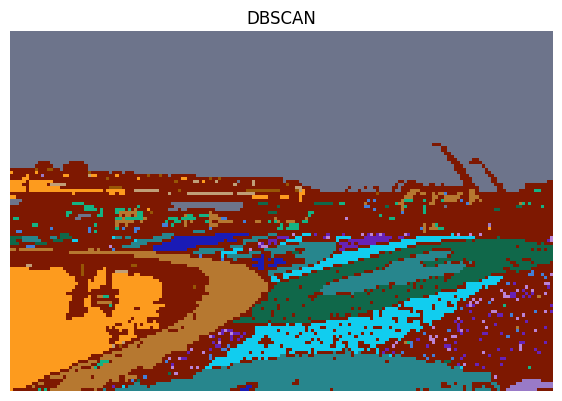

In [770]:
# посмотрим на нашу картинку
draw_picture(output_image_4, 'DBSCAN', bgr=True)

In [771]:
color_space_1 = []
for ele in np.unique(target):
    color_space_1.append(df[df['clusters'] == ele].iloc[0].tolist()[:3])

color_space_1 = np.asarray(color_space_1)
color_space_1[:5]

array([[ 46, 171, 233],
       [  0,  93, 254],
       [ 11,  62, 145],
       [125, 160, 193],
       [ 62, 124, 186]])

In [772]:
# вернем обратно в беззнаковое целое число, чтобы визуализировать изображение
output_image_4 = np.reshape(color_space_1.astype('uint8')[target],
                            (img_4.shape[0], img_4.shape[1], 3)
                           )

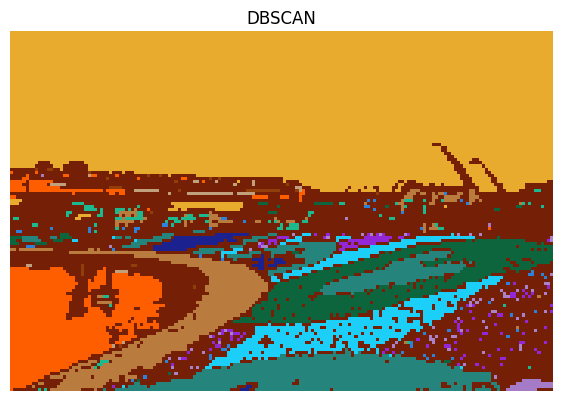

In [773]:
# посмотрим на нашу картинку
draw_picture(output_image_4, 'DBSCAN', bgr=True)

c) AgglomerativeClustering. Число кластеров K = 2, 5, 10, 20.